In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan_data = pd.read_csv("cust_data.csv")
print(loan_data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [16]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
percent_missing = round(100*(loan_data.isnull().sum())/len(loan_data))
percent_missing

Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64

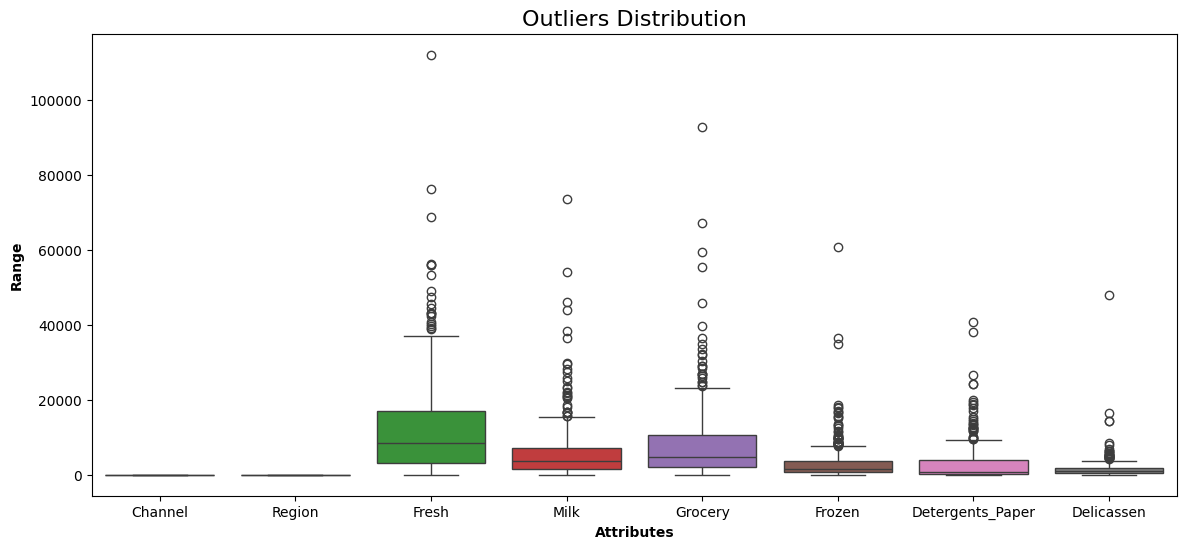

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14, 6]
    sns.boxplot(data=df, orient="v")
    plt.title("Outliers Distribution", fontsize=16)
    plt.ylabel("Range", fontweight='bold')
    plt.xlabel("Attributes", fontweight='bold')
    plt.show()

show_boxplot(loan_data)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline


def remove_outliers(data):
    df = data.copy()
    for col in list(df.columns):
        Q1 = df[col].quantile(0.05)
        Q3 = df[col].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [41]:
without_outliers = remove_outliers(loan_data)

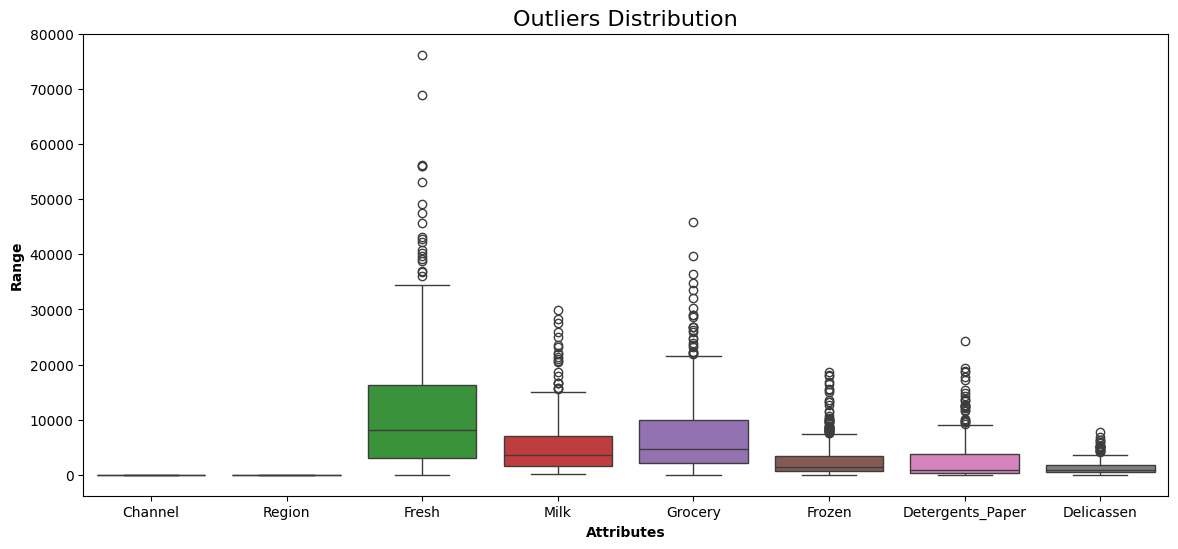

In [42]:
show_boxplot(without_outliers)

In [43]:
without_outliers.shape

(428, 8)

In [44]:
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()

scaled_data = data_scaler.fit_transform(without_outliers)
scaled_data.shape

(428, 8)

In [45]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

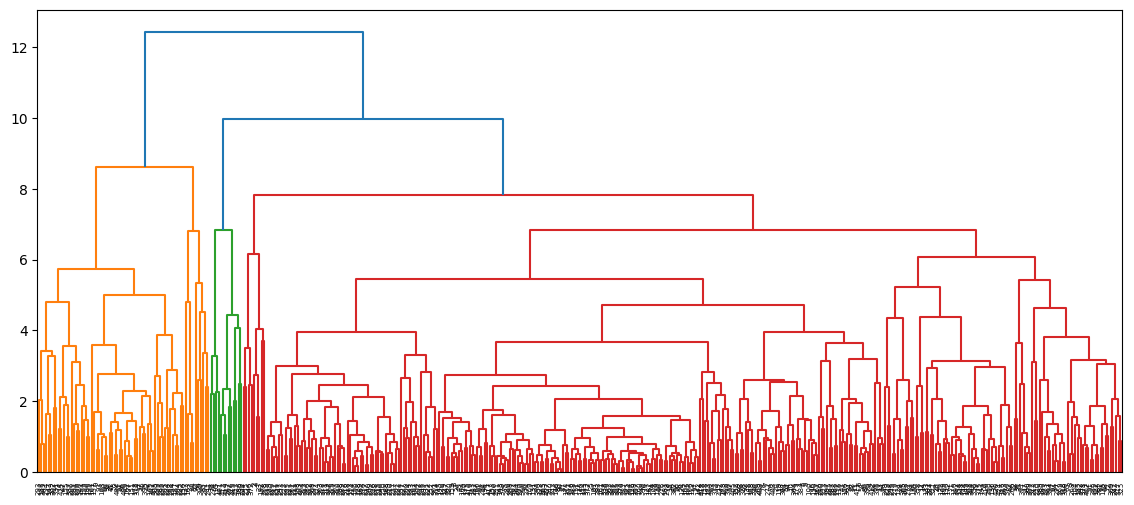

In [46]:
dendrogram(complete_clustering)
plt.show()

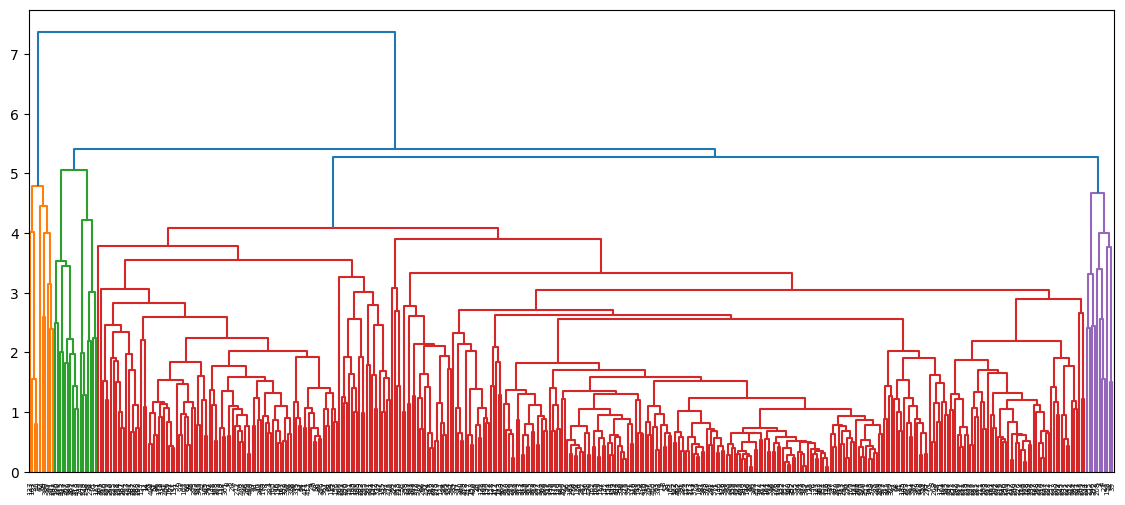

In [47]:
dendrogram(average_clustering)
plt.show()

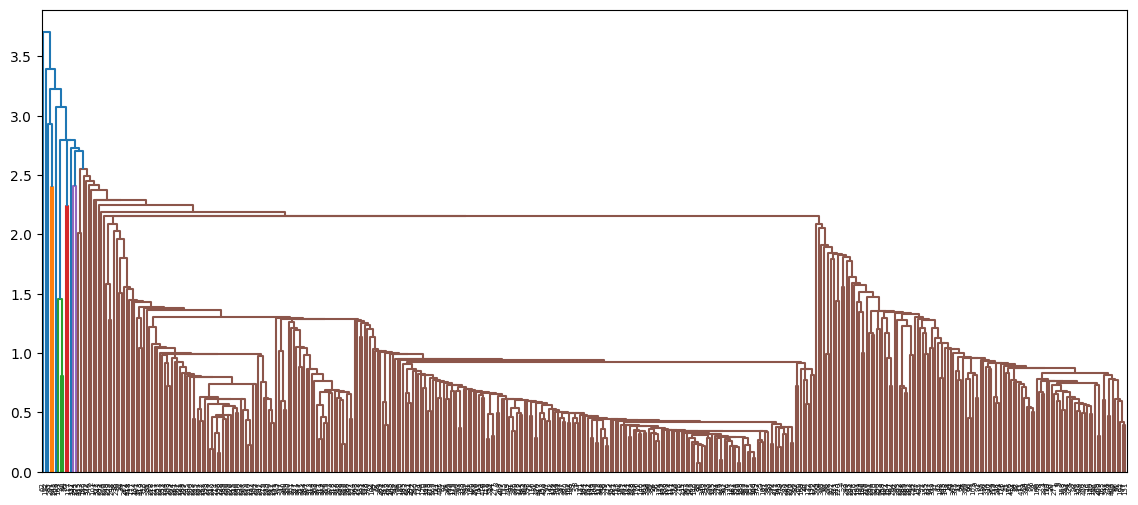

In [48]:
dendrogram(single_clustering)
plt.show()